# Verificación de la Ley de Zipf
7) En este ejercicio se propone verificar la predicción de ley de Zipf. Para ello, descargue desde Project Gutenberg el texto del Quijote de Cervantes[^11] y escriba un programa que extraiga los términos y calcule sus frecuencias (el programa debe generar la lista ordenada por frecuencia descendente). Calcule la curva de ajuste utilizando la función *Polyfit* del módulo NumPy[^12]. Con los datos crudos y los estimados grafique en la notebook ambas distribuciones (haga 2 gráficos, uno en escala lineal y otro en log-log). ¿Cómo se comporta la predicción? ¿Qué conclusiones puede obtener?   

## Pasos:
- Tokenizar y contar frecuencia de términos.
- Ordenar por frecuencia.
- Calcular ajuste con `np.polyfit`.
- Graficar tanto en escala lineal como log-log para comparar.

In [7]:
from Tokenizador import Tokenizador
import numpy as np
import os

In [8]:
# Tokenizar y calcular frecuencias
tokenizador = Tokenizador()
resultados = tokenizador.analizar_coleccion("datos/")

output_dir = "resultados/"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
tokenizador.generar_archivos_salida(resultados, output_dir)

# Ordenar términos por frecuencia descendente
sorted_terms = sorted(
    [(termino, data["cf"]) for termino, data in resultados["terminos"].items()],
    key=lambda x: x[1],
    reverse=True
)

In [ ]:
# Obtener listas de ranking y frecuencias ordenadas para graficar
ranks = list(range(1, len(sorted_terms) + 1))  # 1, 2, 3, ...
freqs = [freq for _, freq in sorted_terms]

# Descomentar para seleccionar top 100 terms (para que se aprecie mejor y ver el decrecimiento de la curva más suave)

# ranks = list(range(1, len(sorted_terms[:100]) + 1))  # 1, 2, 3, ...
# freqs = [freq for _, freq in sorted_terms[:100]]

# Ajuste de curva con np.polyfit en escala log-log.  Ajusta una curva al modelo de Zipf y obtiene los parámetros C (Constante de proporcionalidad) y β (Exponente de la Ley de Zipf).
log_ranks = np.log(ranks)   # Convertir a logaritmo
log_freqs = np.log(freqs)

# polyfit de grado 1 (recta)
coef = np.polyfit(x=log_ranks, y=log_freqs, deg=1)
print("Coeficientes de la recta log-log:", coef)  # Returns a vector of coefficients p (coeficientes a y b o pendiente y término independiente de la recta ajustada)
# Nota: Si la pendiente (β) es cercana a -1, los datos siguen la Ley de Zipf.

# Cálculo de la recta estimada
fitted_log_freqs = np.polyval(coef, log_ranks)  # Evalúa el polinomio ajustado (la recta) en los valores de log_ranks
# Devuelve los valores estimados de log_freqs (frecuencias en escala logarítmica) según el modelo ajustado
fitted_freqs = np.exp(fitted_log_freqs) # Convertir de nuevo a escala normal (inversión del logaritmo)

Coeficientes de la recta log-log: [-1.21296839 11.90488729]


### Explicación bloque anterior
La función **np.polyval()** se utiliza para evaluar el polinomio (la recta) que se ha ajustado con **np.polyfit()** en los puntos de $\log(\text{ranking})$. Esto es importante porque:

- **Obtención de valores estimados:** Una vez que np.polyfit te devuelve los coeficientes (que en este caso son el intercepto y la pendiente, equivalentes a $\log C$ y $-\beta$), necesitas calcular cuáles serían los valores de $\log(\text{frecuencia})$ estimados para cada $ \log(\text{ranking})$. np.polyval hace justamente eso: evalúa la recta ajustada en cada punto.

- **Comparación con los datos reales:** Con los valores estimados en logaritmo, se puede luego aplicar np.exp para volver a la escala original y obtener la estimación de la función de Zipf, $f(r) = C \cdot r^{-\beta}$. Esto permite superponer la curva ajustada sobre los datos reales y ver cómo se comporta el modelo.

En otras palabras, **np.polyval()** no es un paso extra innecesario, sino que forma parte del proceso para transformar los coeficientes obtenidos en un modelo que pueda evaluarse en cada punto y compararse con los datos observados. Así, estás, de hecho, estimando la función de la ley de Zipf a partir del modelo lineal en el espacio logarítmico y luego llevándola a la escala original para visualizarla.

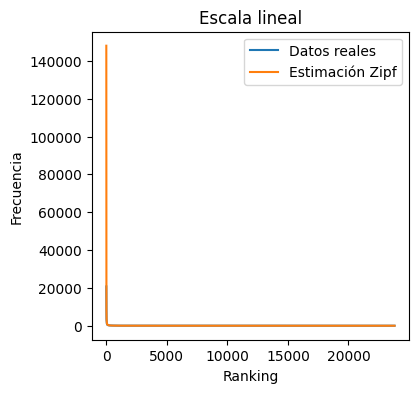

In [ ]:
# Graficar en escala lineal
import matplotlib.pyplot as plt

plt.figure(figsize=(9, 4)) # Crea una figura con tamaño 9x4 pulgadas
plt.subplot(1, 2, 1)    # Crea un subplot en la posición 1 de una figura con 1 fila y 2 columnas
plt.plot(ranks, freqs, label="Datos reales")    # Grafica los datos reales (frecuencias observadas) en escala lineal
plt.plot(ranks, fitted_freqs, label="Estimación Zipf")  # Grafica los datos ajustados (frecuencias estimadas por la ley de Zipf) en escala lineal
plt.xlabel("Ranking")   # Etiqueta el eje X como "Ranking"
plt.ylabel("Frecuencia")
plt.title("Escala lineal")
plt.legend()

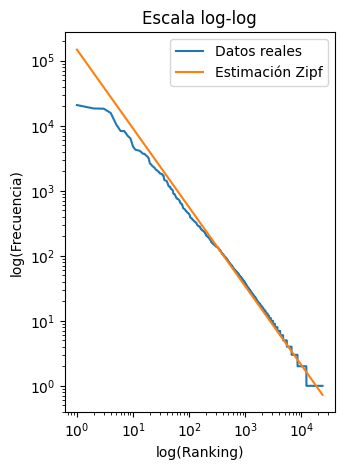


Conclusión básica: Si el exponente del ajuste log-log es cercano a -1, la distribución se aproxima a una ley de Zipf.


In [ ]:
# Graficar en escala log-log
plt.subplot(1, 2, 2)
plt.loglog(ranks, freqs, label="Datos reales")
plt.loglog(ranks, fitted_freqs, label="Estimación Zipf")
plt.xlabel("log(Ranking)")
plt.ylabel("log(Frecuencia)")
plt.title("Escala log-log")
plt.legend()

plt.tight_layout()
plt.show()